# Heart Detection 
#### This model depend on that data provided it will predict that if you have a problem with your heart or not 

In [2]:
# import needed the most important libraries 

import numpy as  np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

In [3]:
# load the data
data=pd.read_csv(r'heart.csv')

In [4]:
# print the first 5 rows of the data
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# print the last 5 rows of the data
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# print the shape of the data
data.shape

(303, 14)

In [7]:
# print the columns of the data
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
# print the information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# print the description of the data
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
# check for missing values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
# check for duplicates
data.duplicated().sum()

1

In [12]:
# drop duplicates
data.drop_duplicates(inplace=True)

In [13]:
# check for duplicates
data.duplicated().sum()

0

In [14]:
# check for the unique values in the target column
data['target'].unique()

array([1, 0], dtype=int64)

In [15]:
# check for the value counts in the target column
data['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

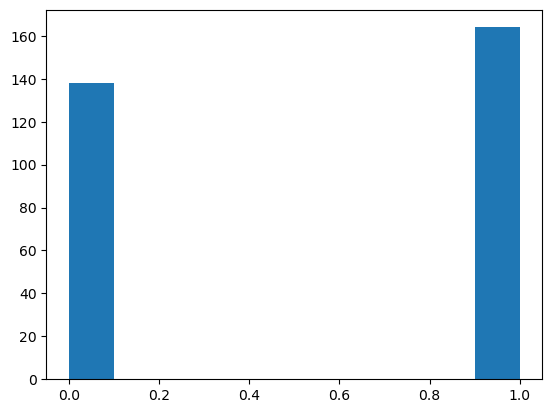

In [16]:
# visualize the value counts
plt.hist(data['target'])
plt.show()

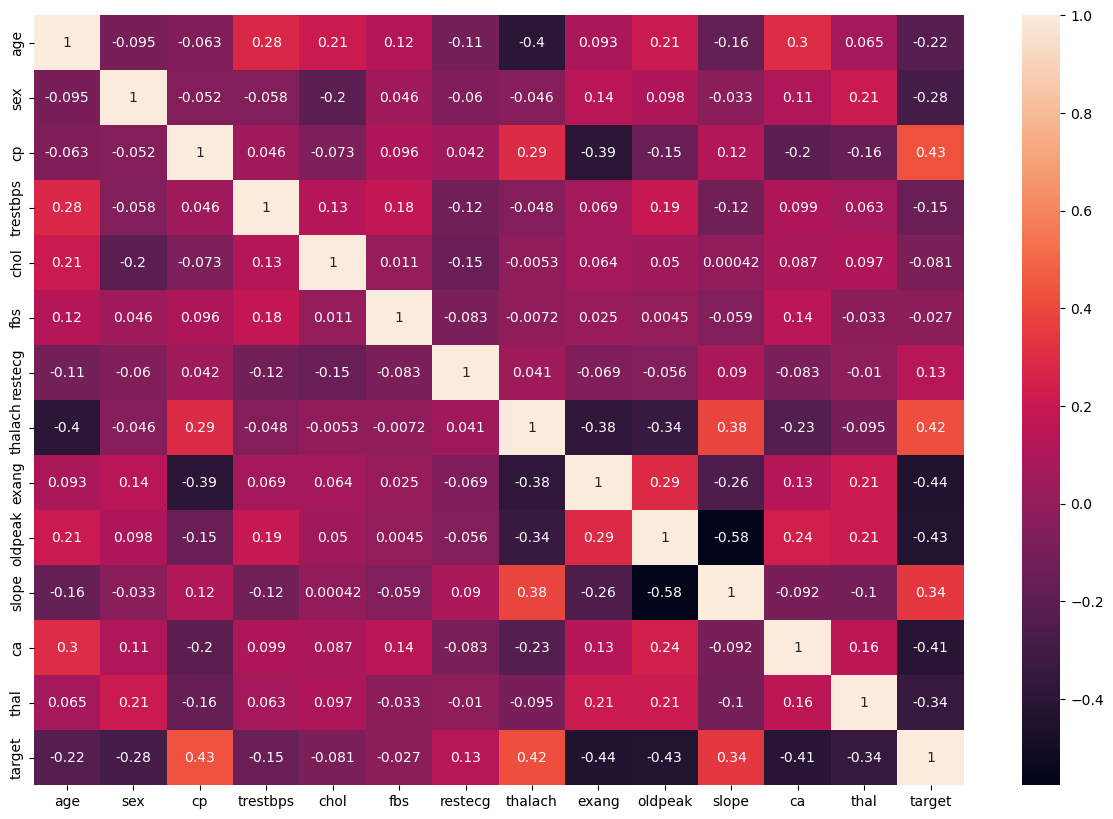

In [17]:
# visualization the heatmap
cor=data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor,annot=True)
plt.show()

In [18]:
cor_target=abs(cor['target'])
cor_target=cor_target.sort_values(ascending=False)
cor_target

target      1.000000
exang       0.435601
cp          0.432080
oldpeak     0.429146
thalach     0.419955
ca          0.408992
slope       0.343940
thal        0.343101
sex         0.283609
age         0.221476
trestbps    0.146269
restecg     0.134874
chol        0.081437
fbs         0.026826
Name: target, dtype: float64

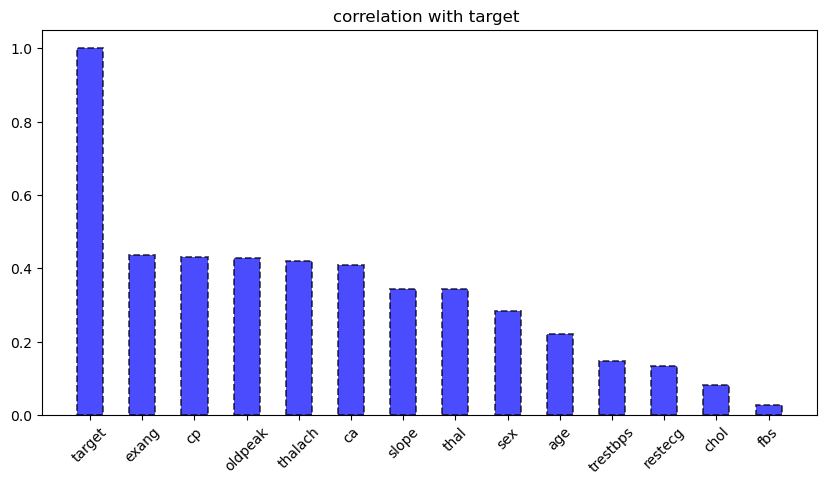

In [19]:
plt.figure(figsize=(10,5))
plt.bar(cor_target.index,
        cor_target,
        color='blue'
        ,alpha=0.7
        ,width=0.5
        ,edgecolor='black'
        ,linewidth=1.3,
        linestyle='--',
        label='correlation with target',
        align='center',
        orientation='vertical')
plt.title("correlation with target ")
plt.xticks(rotation=45)
plt.show()

<Figure size 1500x1000 with 0 Axes>

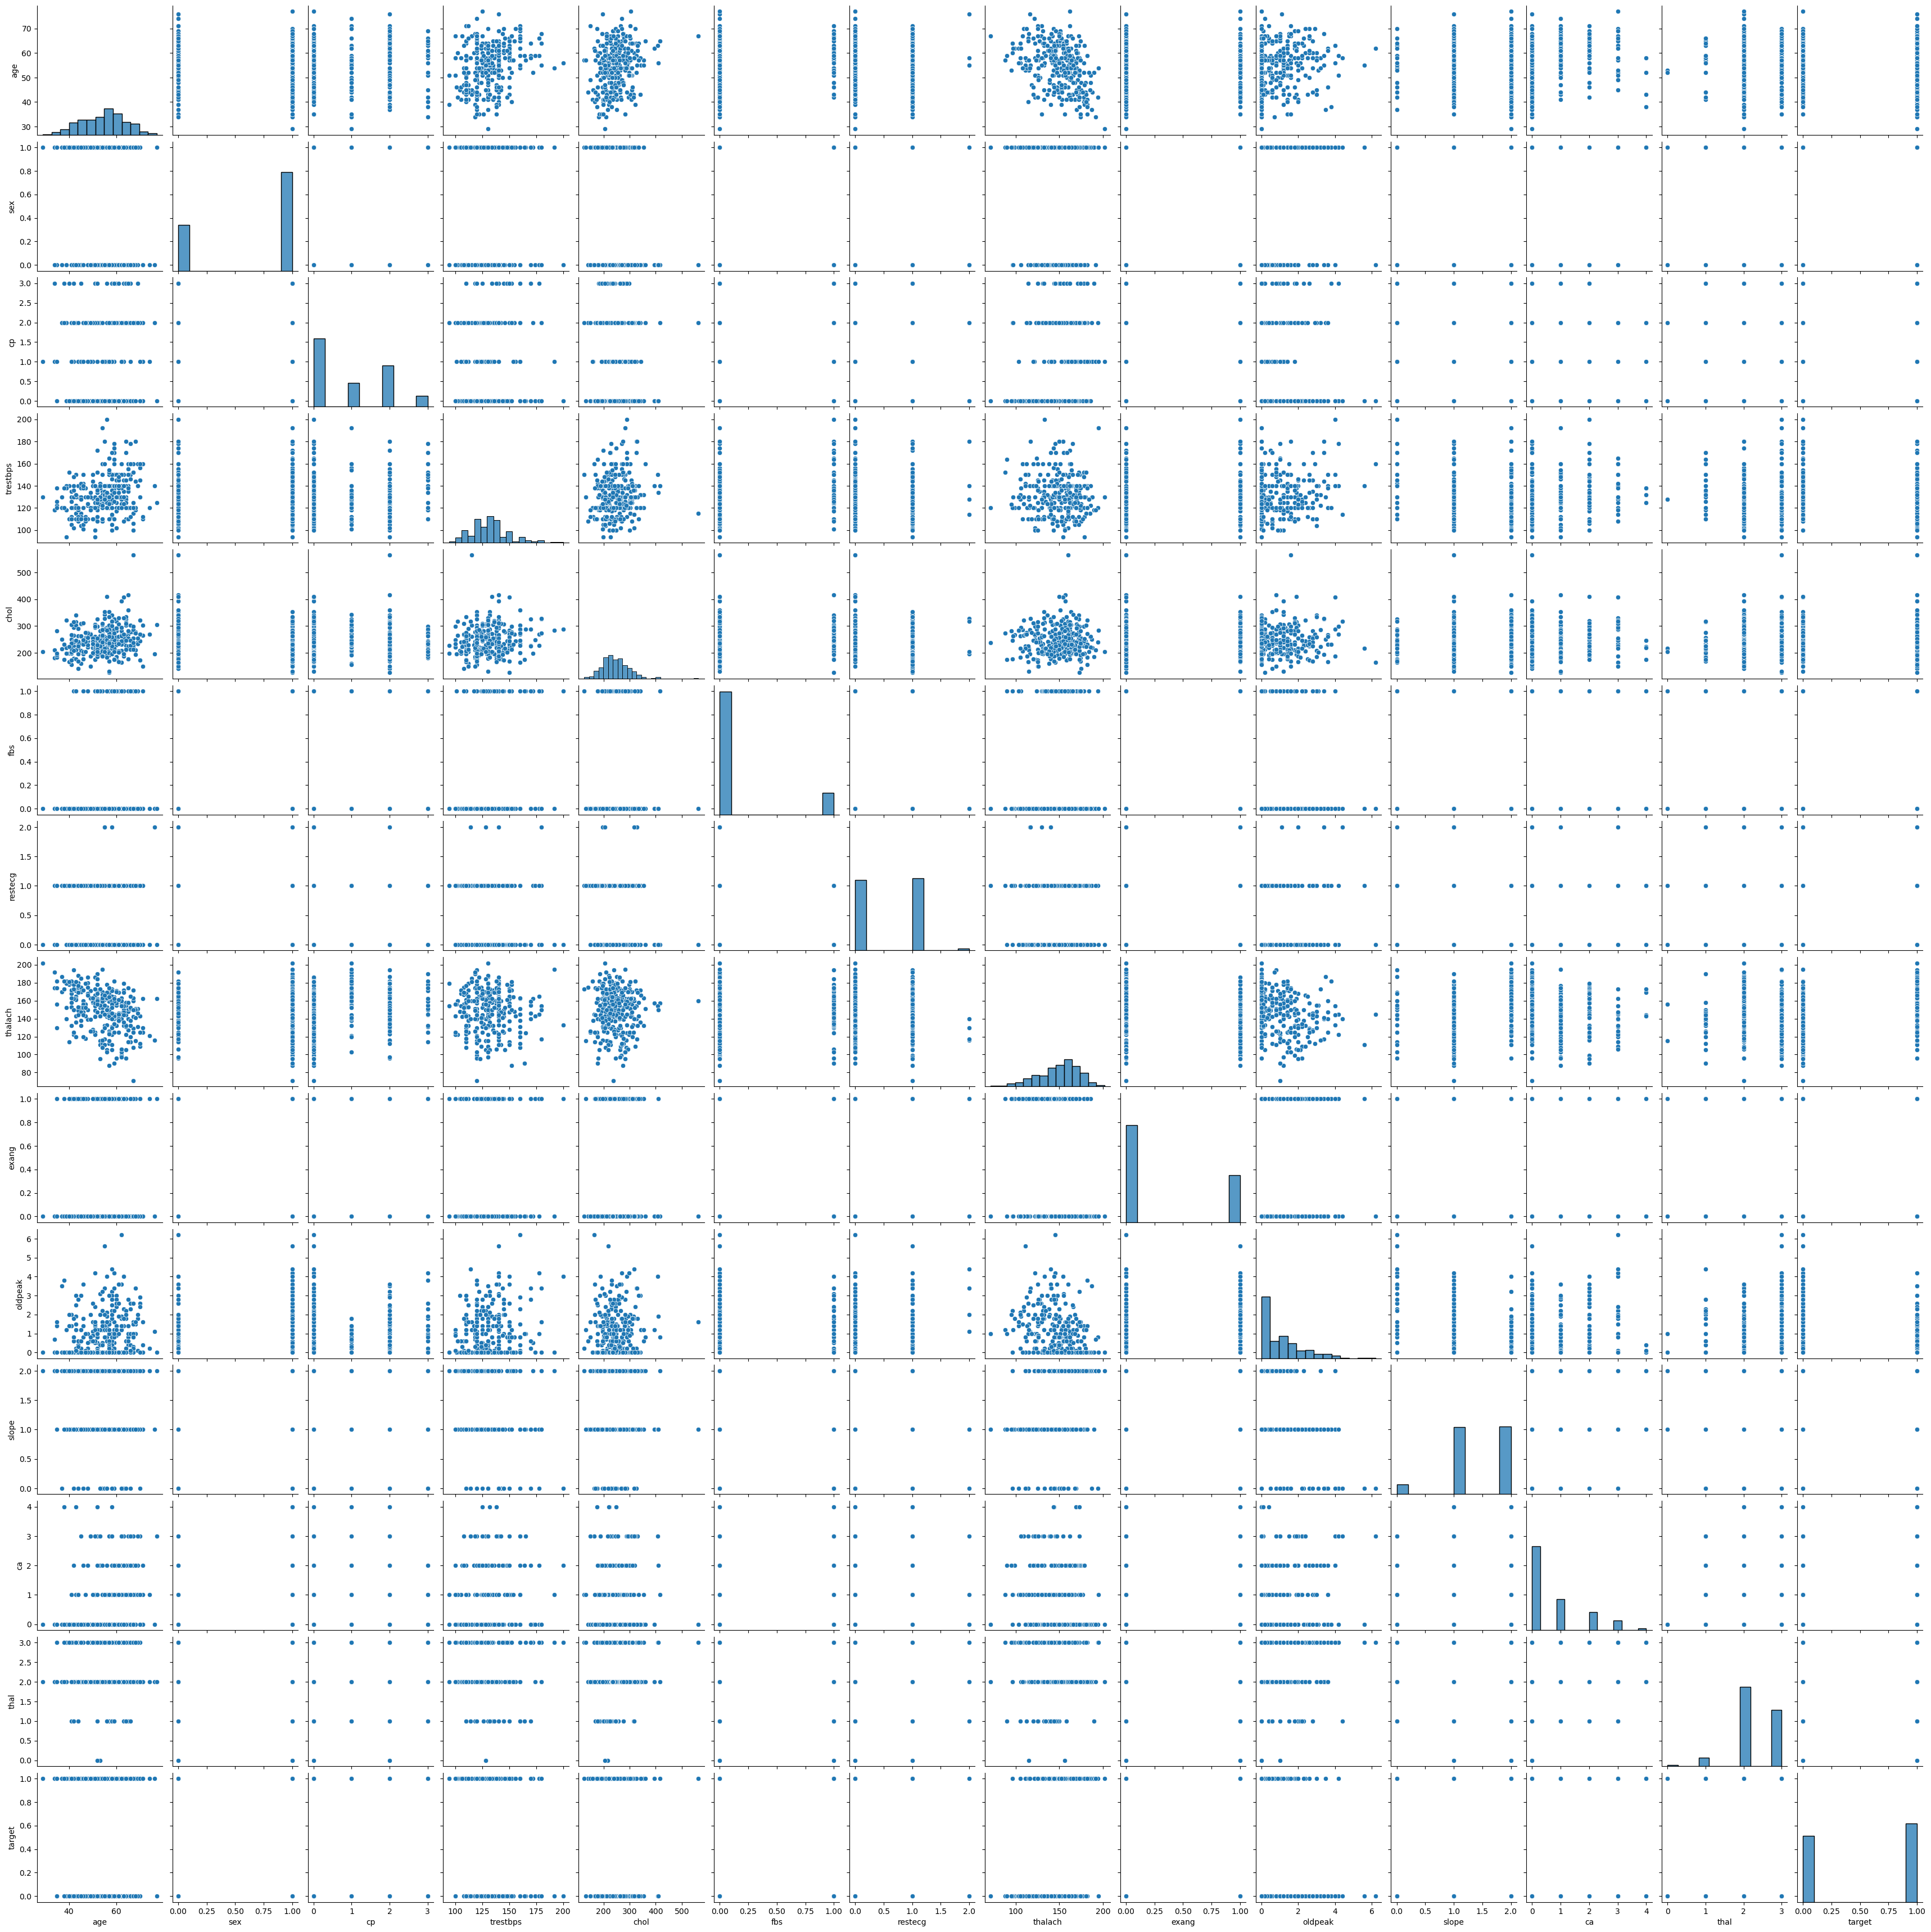

In [20]:
# visualize the data
plt.figure(figsize=(15,10))
sns.pairplot(data)
plt.show()

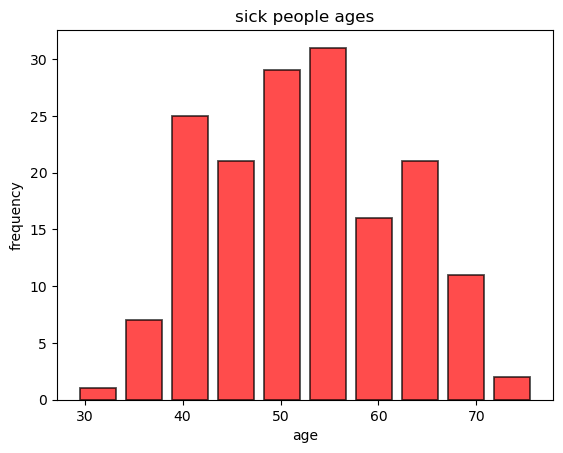

In [21]:
# sick people ages
sick_ages=data[data['target']==1]['age'].sort_values(ascending=True)
plt.hist(sick_ages, bins=10, color='red', edgecolor='black', linewidth=1.3, alpha=0.7, label='sick people ages', orientation='vertical', align='mid', rwidth=0.8, histtype='bar', cumulative=False, log=False, stacked=False)
plt.xlabel('age')
plt.ylabel('frequency')
plt.title('sick people ages')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_54252\4033187646.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='age', data=data, palette='Set1', linewidth=2.5, order=None, orient=None, hue=None, dodge=True, showmeans=True, meanline=True, showfliers=True, whis=1.5)


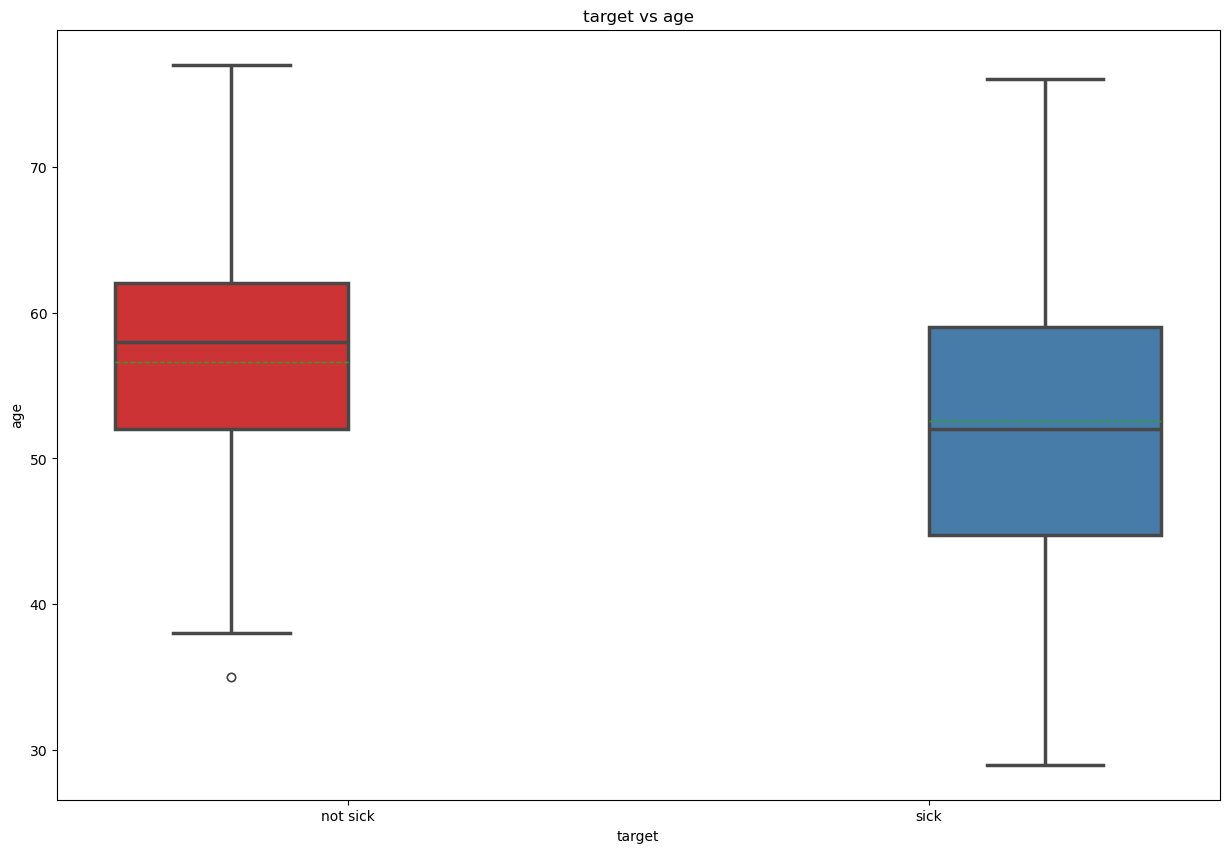

In [22]:
plt.figure(figsize=(15,10))
sns.boxplot(x='target', y='age', data=data, palette='Set1', linewidth=2.5, order=None, orient=None, hue=None, dodge=True, showmeans=True, meanline=True, showfliers=True, whis=1.5)
plt.xlabel('target')
plt.ylabel('age')
plt.title('target vs age')
plt.xticks([0,1],['not sick','sick'])
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_54252\210220450.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='trestbps', data=data, palette='Set1', linewidth=2.5, order=None, orient=None, hue=None, dodge=True, showmeans=True, meanline=True, showfliers=True, whis=1.5)


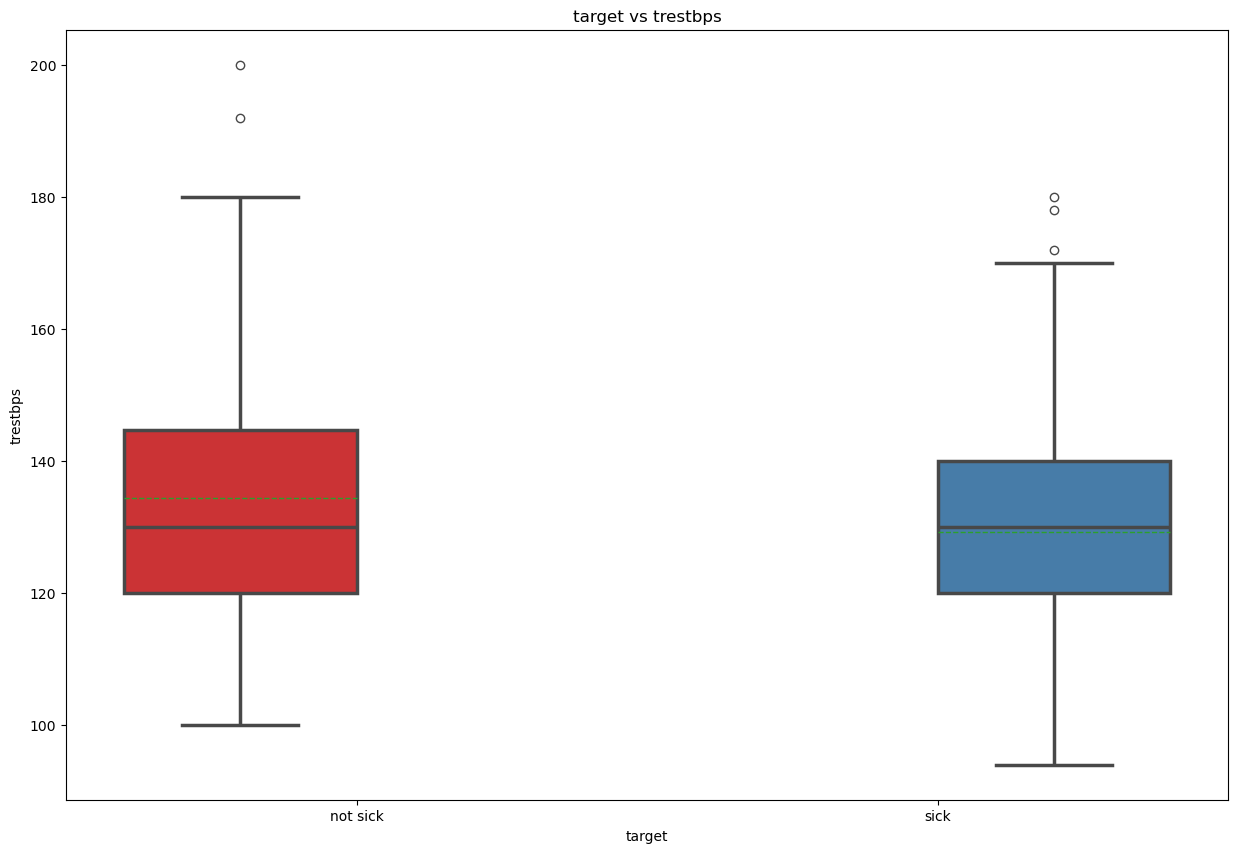

In [23]:
plt.figure(figsize=(15,10))
sns.boxplot(x='target', y='trestbps', data=data, palette='Set1', linewidth=2.5, order=None, orient=None, hue=None, dodge=True, showmeans=True, meanline=True, showfliers=True, whis=1.5)
plt.xlabel('target')
plt.ylabel('trestbps')
plt.title('target vs trestbps')
plt.xticks([0,1],['not sick','sick'])
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_54252\1893347621.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='chol', data=data, palette='Set1', linewidth=2.5, order=None, orient=None, hue=None, dodge=True, showmeans=True, meanline=True, showfliers=True, whis=1.5)


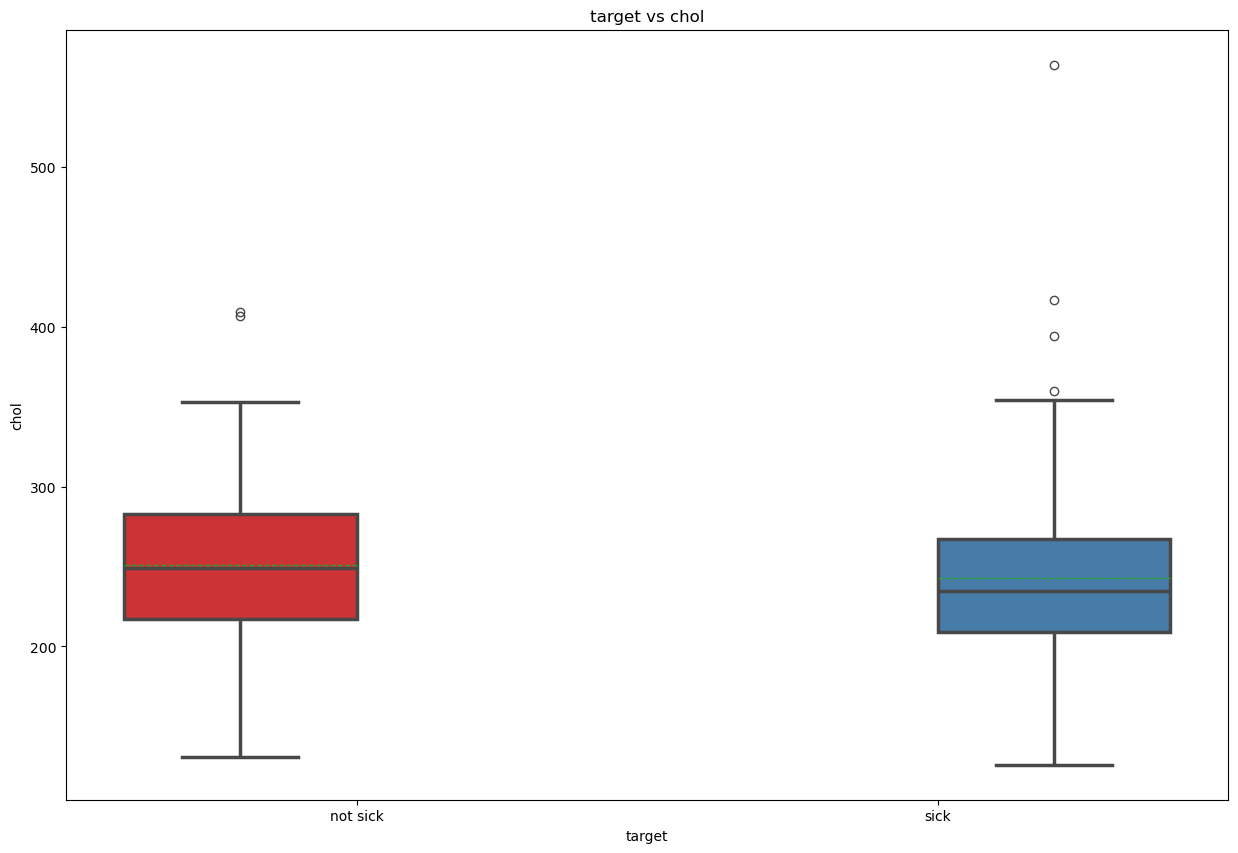

In [24]:
plt.figure(figsize=(15,10))
sns.boxplot(x='target', y='chol', data=data, palette='Set1', linewidth=2.5, order=None, orient=None, hue=None, dodge=True, showmeans=True, meanline=True, showfliers=True, whis=1.5)
plt.xlabel('target')
plt.ylabel('chol')
plt.title('target vs chol')
plt.xticks([0,1],['not sick','sick'])
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_54252\1018369848.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='thalach', data=data, palette='Set1', linewidth=2.5, order=None, orient=None, hue=None, dodge=True, showmeans=True, meanline=True, showfliers=True, whis=1.5)


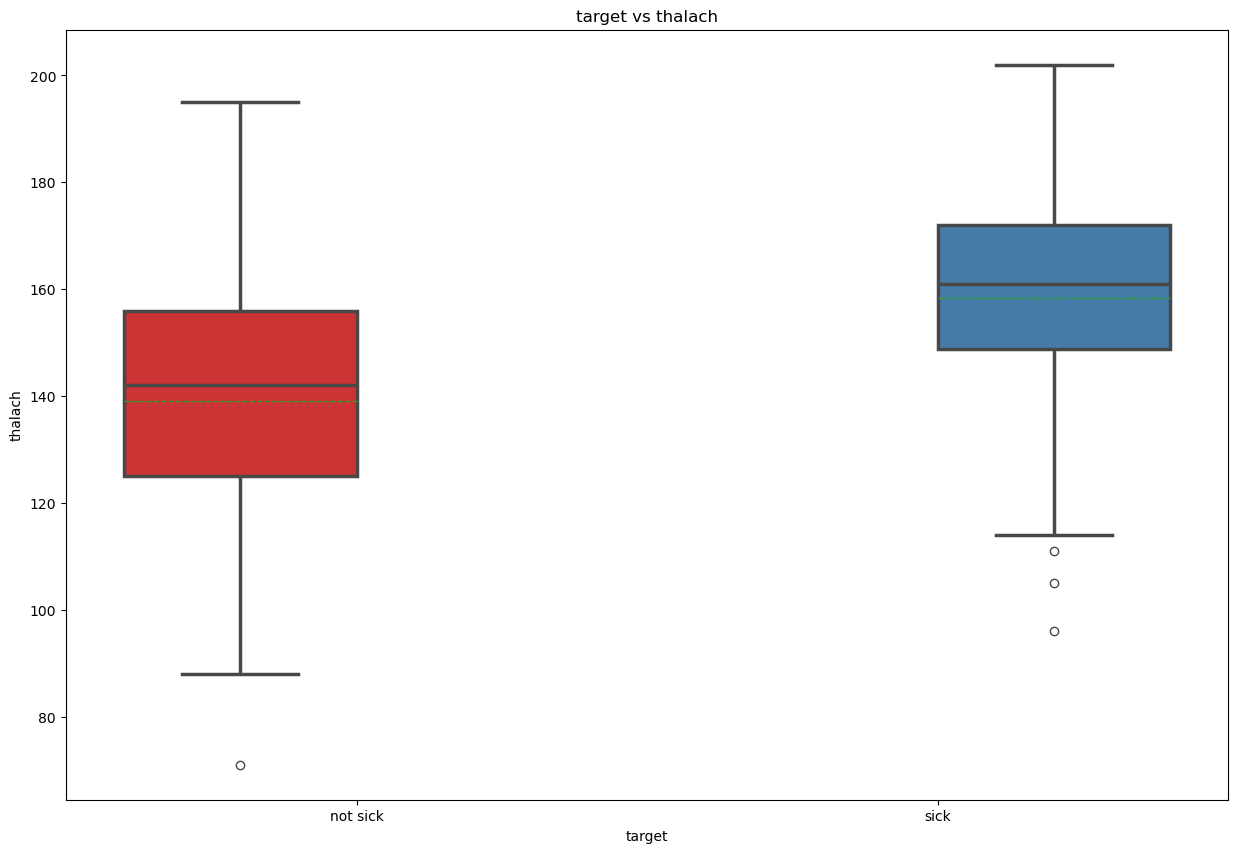

In [25]:
plt.figure(figsize=(15,10))
sns.boxplot(x='target', y='thalach', data=data, palette='Set1', linewidth=2.5, order=None, orient=None, hue=None, dodge=True, showmeans=True, meanline=True, showfliers=True, whis=1.5)
plt.xlabel('target')
plt.ylabel('thalach')
plt.title('target vs thalach')
plt.xticks([0,1],['not sick','sick'])
plt.show()

In [26]:
# scaling the data using StandardScaler
scaler = StandardScaler()  
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [27]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.949794,1,3,0.764066,-0.261285,1,0,0.018826,0,1.084022,0,0,1,1
1,-1.928548,1,2,-0.091401,0.067741,0,1,1.636979,0,2.118926,0,0,2,1
2,-1.485726,0,1,-0.091401,-0.822564,0,0,0.980971,0,0.307844,2,0,2,1
3,0.174856,1,1,-0.661712,-0.203222,0,1,1.243374,0,-0.209608,2,0,2,1
4,0.285561,0,0,-0.661712,2.080602,0,1,0.587366,1,-0.382092,2,0,2,1


In [28]:
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
data = pd.get_dummies(data, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)


In [30]:
data.head()
data.drop(['cp_1','cp_2','cp_3','restecg_1','restecg_2','slope_1','slope_2',	'thal_1',	'thal_2',	'thal_3'], axis=1, inplace=True)

In [31]:
data.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target
0,0.949794,1,0.764066,-0.261285,1,0.018826,0,1.084022,0,1
1,-1.928548,1,-0.091401,0.067741,0,1.636979,0,2.118926,0,1
2,-1.485726,0,-0.091401,-0.822564,0,0.980971,0,0.307844,0,1
3,0.174856,1,-0.661712,-0.203222,0,1.243374,0,-0.209608,0,1
4,0.285561,0,-0.661712,2.080602,0,0.587366,1,-0.382092,0,1


In [32]:
#using random forest classifier
random_forest_model = RandomForestClassifier(random_state=42)
# Train the model
random_forest_model.fit(X_train, y_train)

# Make predictions
y_pred = random_forest_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8688524590163934
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Confusion Matrix:
 [[26  3]
 [ 5 27]]


In [33]:
importances = random_forest_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

     Feature  Importance
7    thalach    0.123093
9    oldpeak    0.113440
11        ca    0.111613
2         cp    0.110655
12      thal    0.100442
0        age    0.100309
4       chol    0.081189
3   trestbps    0.069357
8      exang    0.063221
10     slope    0.056294
1        sex    0.038493
6    restecg    0.020906
5        fbs    0.010988


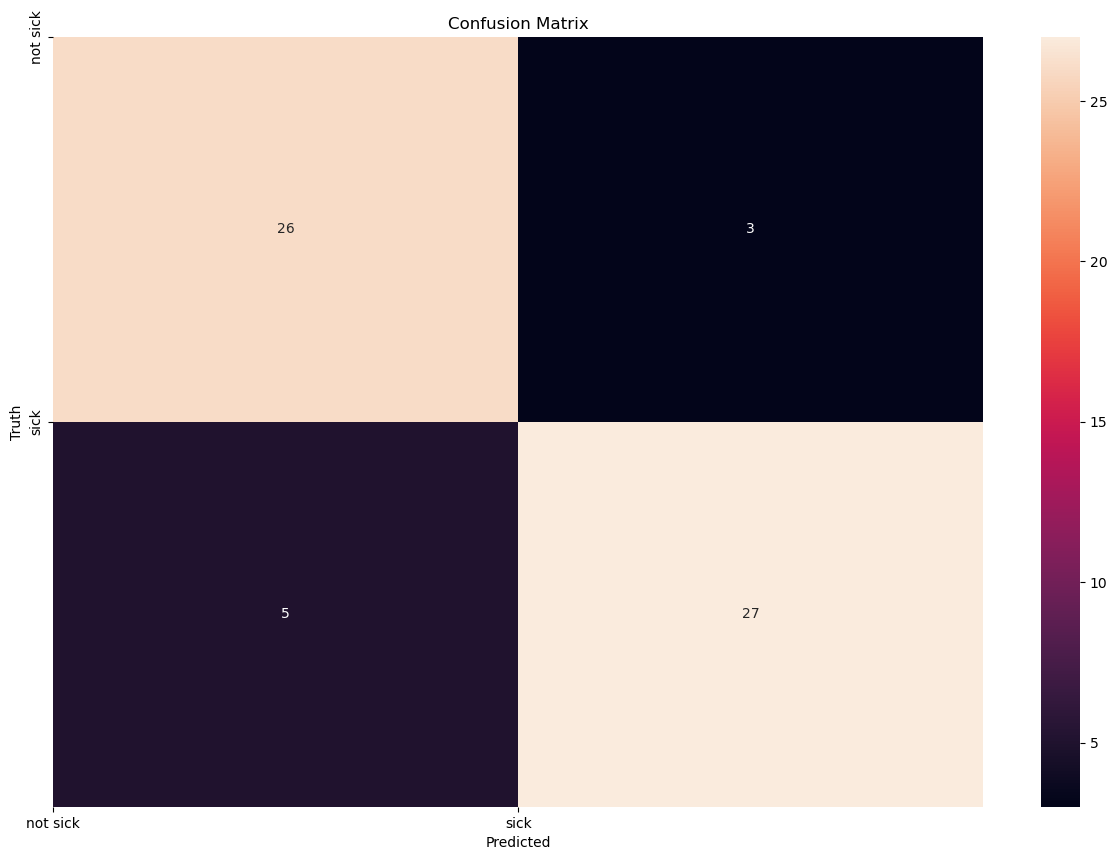

In [34]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xticks([0,1],['not sick','sick'])
plt.yticks([0,1],['not sick','sick'])
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

In [35]:
logistic_regression_model = LogisticRegression(random_state=42)
# Train the model
logistic_regression_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_regression_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8360655737704918
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

Confusion Matrix:
 [[25  4]
 [ 6 26]]


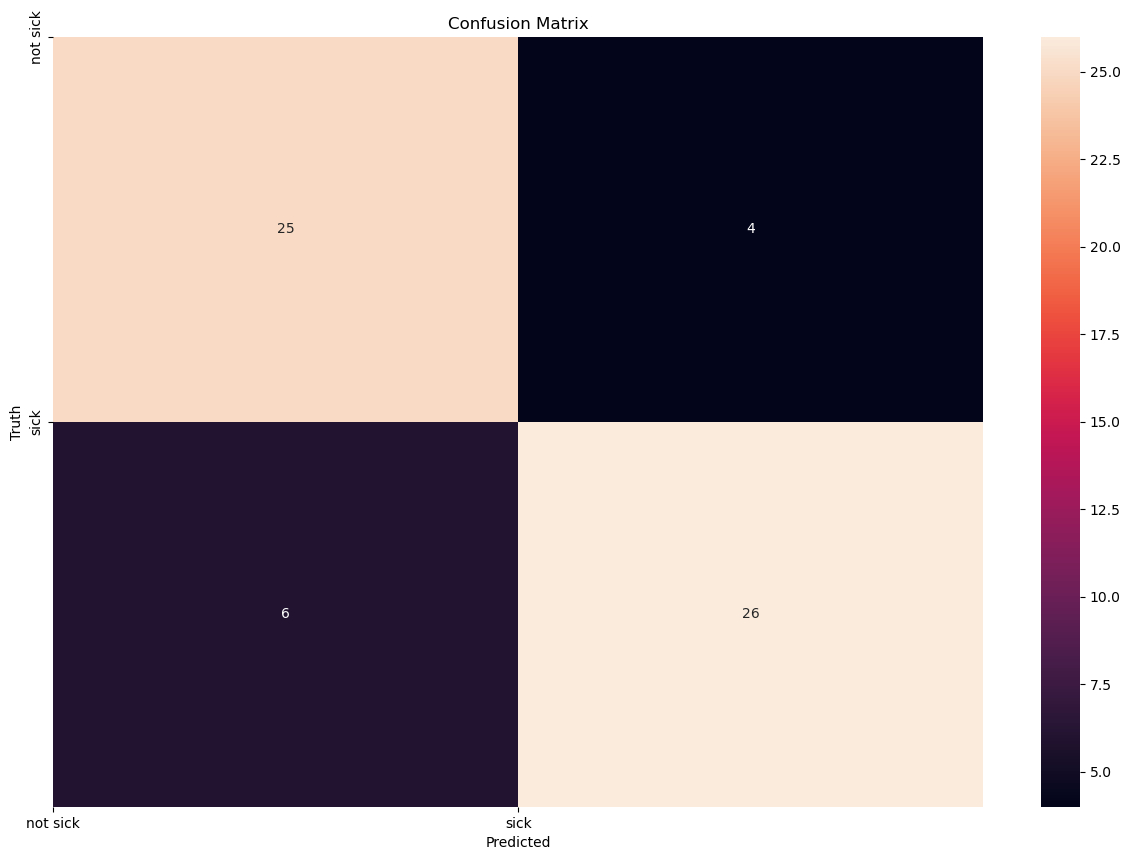

In [36]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xticks([0,1],['not sick','sick'])
plt.yticks([0,1],['not sick','sick'])
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

In [37]:
svc_model = SVC(random_state=42)
# Train the model
svc_model.fit(X_train, y_train)

# Make predictions
y_pred = svc_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8852459016393442
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

Confusion Matrix:
 [[25  4]
 [ 3 29]]


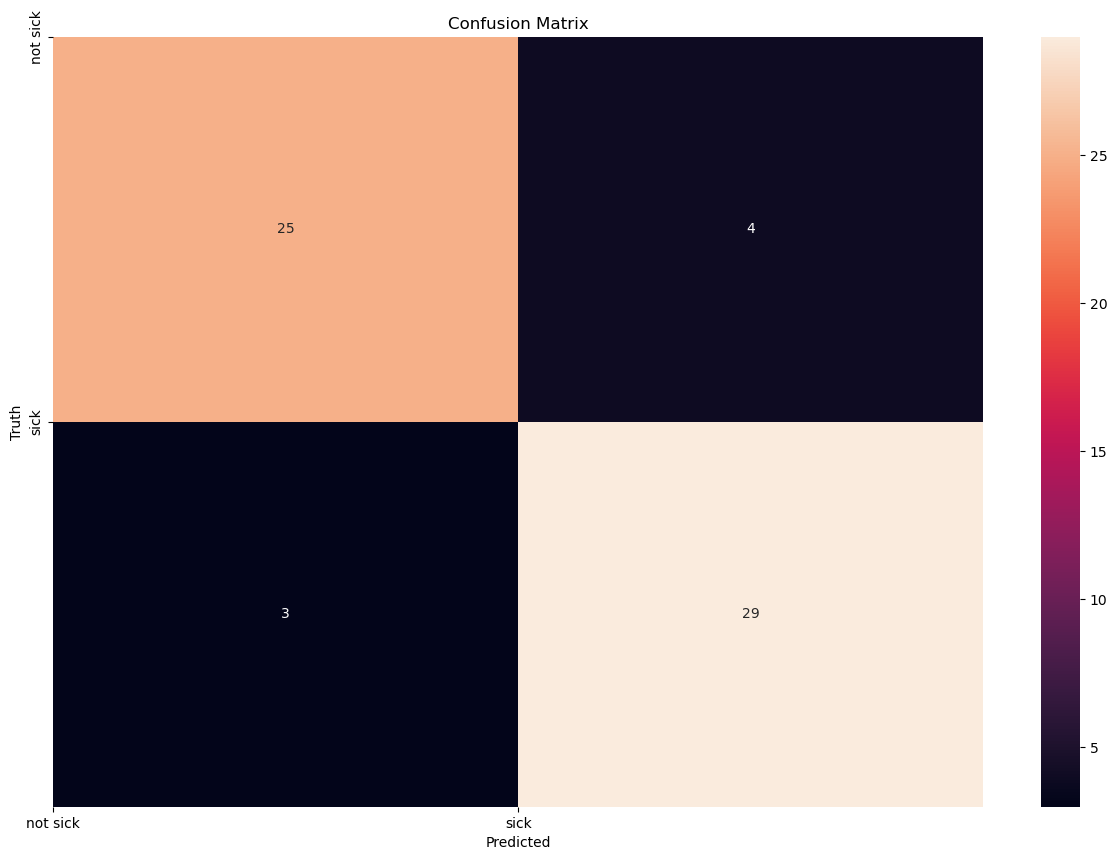

In [39]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xticks([0,1],['not sick','sick'])
plt.yticks([0,1],['not sick','sick'])
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

In [41]:
XGBClassifier_model = XGBClassifier(random_state=42)
# Train the model
XGBClassifier_model.fit(X_train, y_train)

# Make predictions
y_pred = XGBClassifier_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8360655737704918
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

Confusion Matrix:
 [[25  4]
 [ 6 26]]


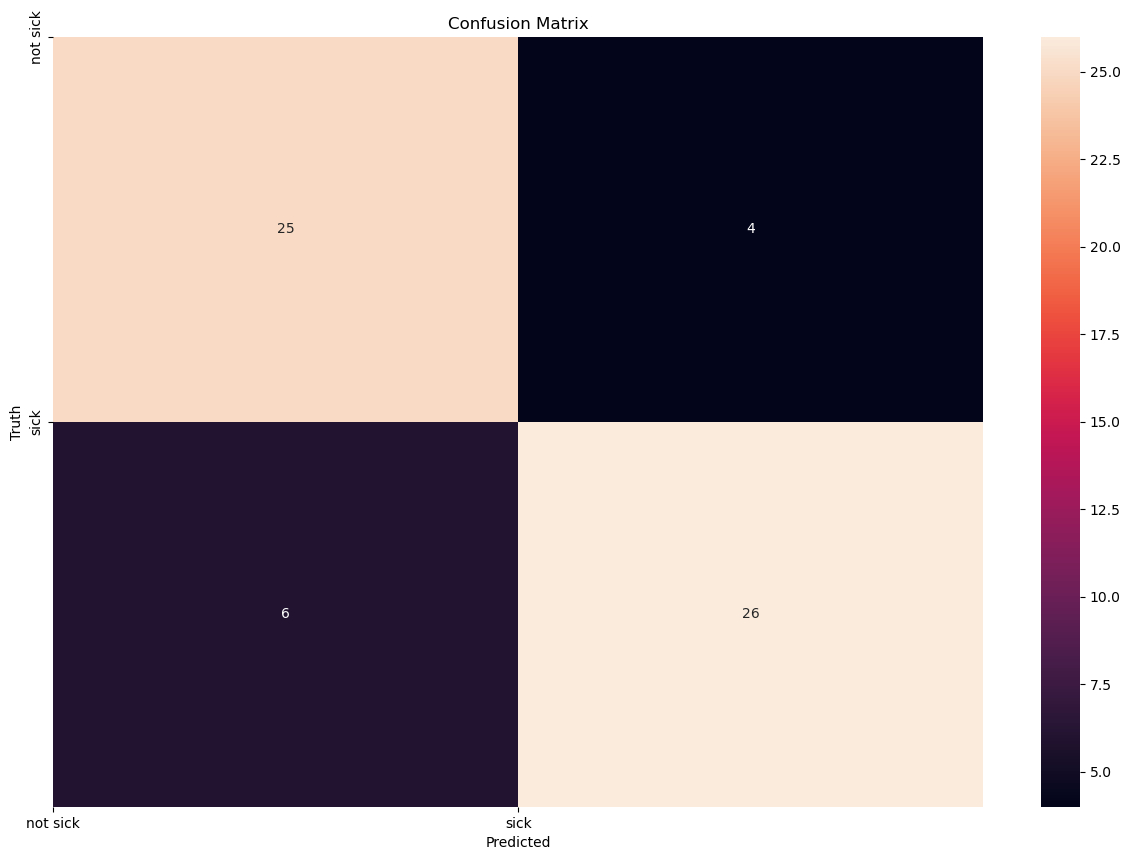

In [42]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xticks([0,1],['not sick','sick'])
plt.yticks([0,1],['not sick','sick'])
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

In [43]:
a=joblib.load('random_forest_model.pkl')
a.predict([[63,1,3,145,233,1,0,150,0,2.3,0,0,1]])

c:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [3]:
joblib.dump(random_forest_model, 'random_forest_model.pkl')
joblib.dump(logistic_regression_model, 'logistic_regression_model.pkl')
joblib.dump(svc_model, 'svc_model.pkl')
joblib.dump(XGBClassifier_model, 'XGBClassifier_model.pkl')
a=joblib.load('random_forest_model.pkl')
a.predict([[63,1,3,145,233,1,0,150,0,2.3,0,0,1]])

NameError: name 'random_forest_model' is not defined